<a href="https://colab.research.google.com/github/karishma-upadhyay/IIITH_Projects_and_Apps/blob/main/Copy_of_AIML_III_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data





**1. Data Extraction (wikipedia):**

The wikipedia library helps you fetch content from Wikipedia pages.

**2. Text Preprocessing (nltk, re, unicodedata):**



>Tokenization and N-grams (nltk):

 Break down text into words or phrases (n-grams) for analysis.



> Cleaning and Normalization (re, unicodedata):

Remove special characters, convert to lowercase, and handle accents/diacritics to standardize the text.



**3) Frequency Analysis (collections.Counter):**

Count the occurrences of words or n-grams.

**4) Visualization (matplotlib, plotly.express):**



> matplotlib:

 Create basic plots like histograms or bar charts to visualize word frequencies.

 >plotly.express:

 Generate more interactive and visually appealing plots.

**5. Data Manipulation (pandas):**

Store and manipulate the extracted data in a structured format for further analysis.



In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=f7dc433f73a352b29da3a6e59d26001e2c50135069562005c42e3afed1ef86b7
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [25]:
#we use beautifulSoup library to extract the data from wikipedia
topic1 = "bat(cricket)"  # Removed extra space after 'pig'
topic2 = "ball(cricket)"

wikipedia.set_lang("en")
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("ja")

ja1 = wikipedia.page(topic1).content
ja2 = wikipedia.page(topic2).content


This is what the text looks like:

In [27]:
ja2

'テニスボール・クリケット（英: Tennis ball cricket）は、テニスボールあるいはテープボールを使用して行われるクリケットの一種である。Tape ball cricketとしても知られている。インド、パキスタン、バングラデシュ、スリランカといった南アジアのクリケット国で非常に人気がある。また、UAE、オマーン、バーレーン、カタールといった中東の国々に済む南アジア人国外居住者やアメリカ合衆国、オーストラリア、カナダの移民によってもプレーされている。\nテニスボール・クリケットで使われるテニスボールの重量はテニス用よりも重く、プロクリケットボールに近い。\n\n\n== 歴史 ==\nテニスボール・クリケットは、カラチ、コルカタ、ラホール、ムンバイといった人口密度が高くクリケット競技場が一般的でないパキスタンやインドの都市で開発された。1990年代初頭に普及し、ワジム・アクラム、サチン・テンドルカール、ショアイブ・アクタールといったクリケット選手が幼少期に才能を育むのに関与した 。\nテニスボール・クリケットは、クリケット競技場や防具が贅沢品である上述の発展途上国の一般市民のための手頃な代わりの方法として設計された。\n\n\n== ルールおよびプレースタイル ==\nテニスボールの代わりにより難易度の高いテープボールが使用されることもある。オーバー数は6から25まで様々である。プロクリケットボールのようにボールが硬くないことを考慮し、グローブ、パッド、ヘルメットのような防具の使用は任意である。\nテニスボール・クリケットはファーストクラスマッチあるいはワン・デイ・インターナショナルと比較してより短時間で行われるため、週末のレクリエーションに特に適している。南アジアの都市や村では、大抵ストリートや道、農地でプレーされている。中東の国々では大抵開けた砂漠でプレーされ、アメリカ合衆国やカナダでは野球場が利用される。\n\n\n== 関連項目 ==\nクリケット\n\n\n== 外部リンク ==\nBBC Sports Article\nCricbay Non-profit cricket community promoting Cricket in the San Francisco Bay Area.\nSFSCA South Florida Softba

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [28]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [29]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
ja1 = cleanup(ja1)
ja2 = cleanup(ja2)

In [19]:
print(eng1)

abayisarecessedcoastalbodyofwaterthatdirectlyconnectstoalargermainbodyofwatersuchasanoceanalakeoranotherbayalargebayisusuallycalledagulfseasoundorbightacoveisasmallcircularbaywithanarrowentranceafjordisanelongatedbayformedbyglacialactionthetermembaymentisalsousedforrelatedfeaturessuchasextinctbaysorfreshwaterenvironmentsabaycanbetheestuaryofariversuchasthechesapeakebayanestuaryofthesusquehannariverbaysmayalsobenestedwithineachotherforexamplejamesbayisanarmofhudsonbayinnortheasterncanadasomelargebayssuchasthebayofbengalandhudsonbayhavevariedmarinegeologythelandsurroundingabayoftenreducesthestrengthofwindsandblockswavesbaysmayhaveaswideavarietyofshorelinecharacteristicsasothershorelinesinsomecasesbayshavebeacheswhichareusuallycharacterizedbyasteepupperforeshorewithabroadflatfrontingterracebaysweresignificantinthehistoryofhumansettlementbecausetheyprovidedeasyaccesstomarineresourceslikefisherieslatertheywereimportantinthedevelopmentofseatradeasthesafeanchoragetheyprovideencouragedtheirsel

In [30]:
print(ja1)

bensonhedgesbhjtjtbensonhedgesltdmgmgmgmgbensonhedgesltdbatbatjtjtbatfbeonedgebensonandhedgesenworldchampionshipofcricketenworldseriescup


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [50]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and Japanese pages. Can you spot a difference?

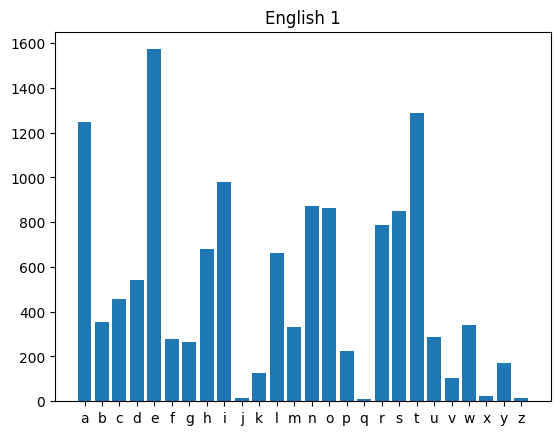

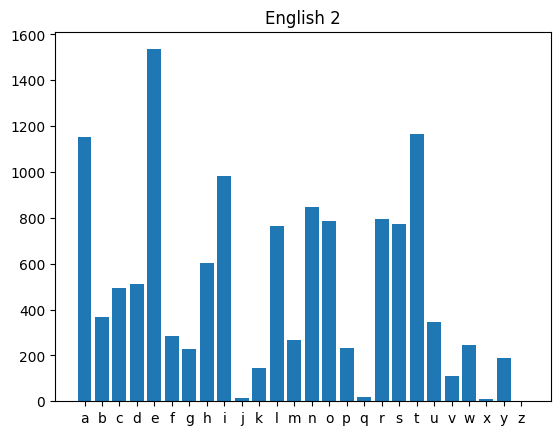

In [52]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)  # Plot for English 1
plt.title('English 1')
plt.show()

unigram_en2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)  # Plot for English 2
plt.title('English 2')
plt.show()

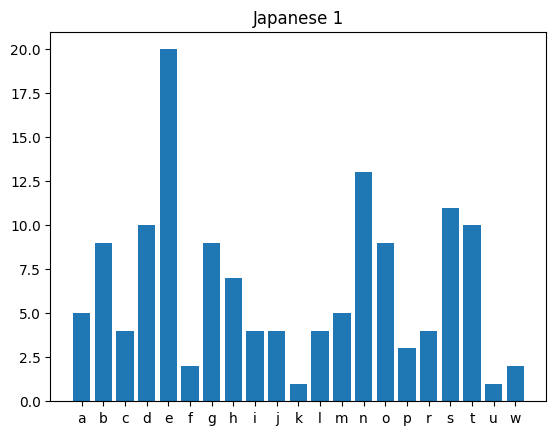

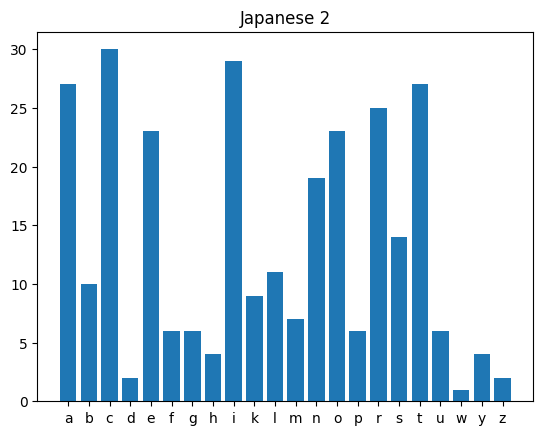

In [33]:
unigram_ja1 = Counter(ngrams(ja1,1))
plothistogram(unigram_ja1)  # Plot for Japanese 1
plt.title('Japanese 1')
plt.show()

unigram_ja2 = Counter(ngrams(ja2,1))
plothistogram(unigram_ja2)  # Plot for Japanese 2
plt.title('Japanese 2')
plt.show()

We can see that the unigrams for Japanese and English are very similar. So this
is not a good feature if we want to distinguish between English and Japanese. Let us look at bigrams.

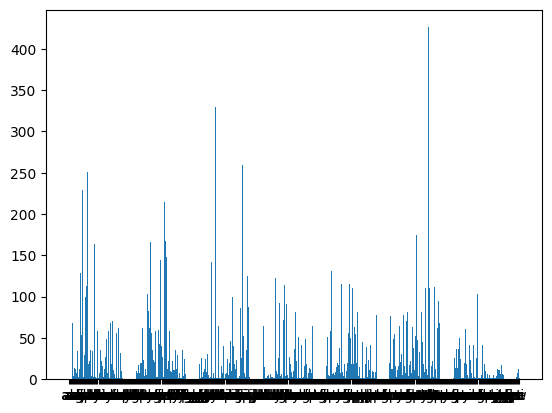

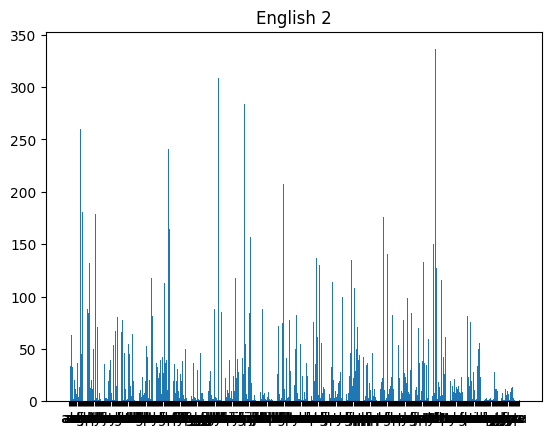

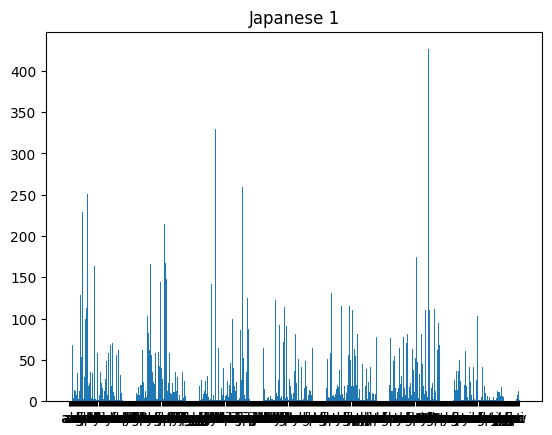

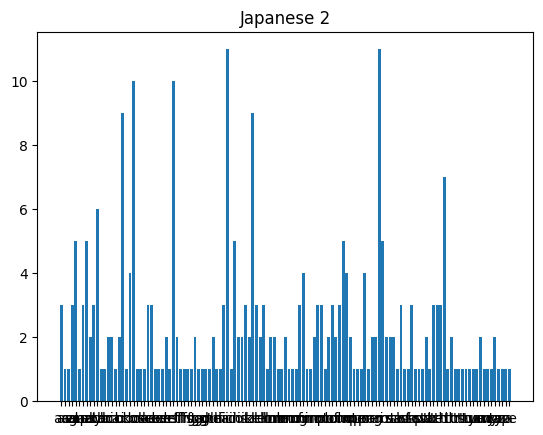

In [54]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_ja1 = Counter(ngrams(ja1,2))
plothistogram(bigram_eng1)
plt.title('Japanese 1')
plt.show()

bigram_ja2 = Counter(ngrams(ja2,2))
plothistogram(bigram_ja2)
plt.title('Japanese 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [55]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

**If you want to plot bigram histograms and store the resulting histograms for further use, you can modify the function plotbihistogram to return the bigram (a group of two characters )histogram data instead of directly plotting it. Then, you can use this returned data to plot the histograms and display them.**

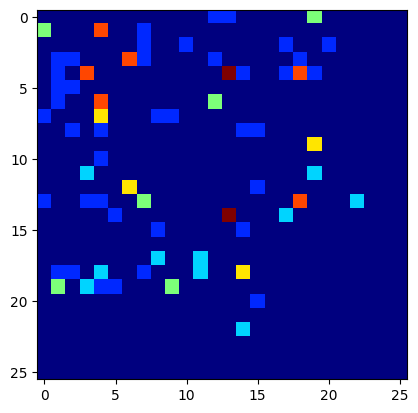

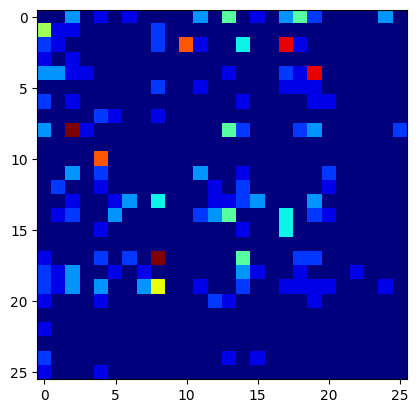

In [70]:
bija1 = plotbihistogram(bigram_ja1)
plt.show()
bija2 = plotbihistogram(bigram_ja2)

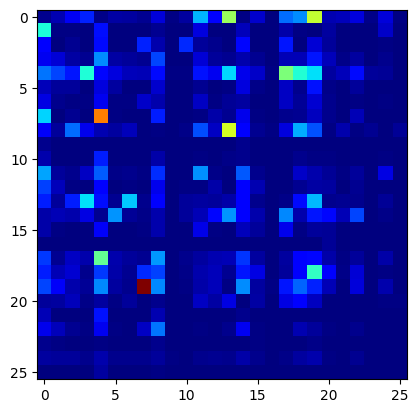

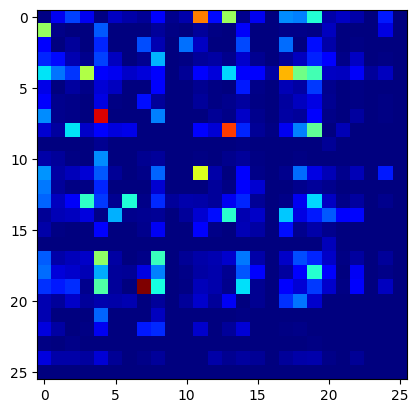

In [71]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

Let us look at the top 10 ngrams for each text.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.

**ans:** Tried using English and Japanese languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

**ans:**Took the example of bat and ball which are totally dfferent from each other.
3. How can we use and visualize trigrams and higher n-grams?

**ans:** Visualizing trigrams and higher n-grams can be similar to visualizing bigrams or unigrams, but it may require different approaches as the complexity is increased of the data.
Calculate the frequency of each n-gram in your text data. This helps you understand which n-grams are common and which are rare.
You can create frequency distributions or histograms to visualize the frequency of trigrams and higher n-grams.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [15]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

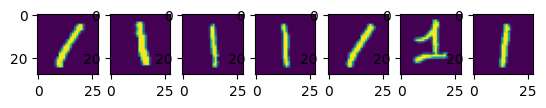

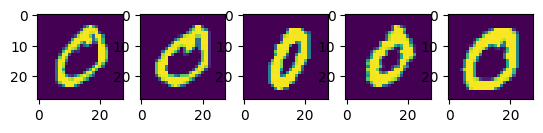

In [18]:
for ii in range(7):#using the range of 7 to visualize things better
  plt.subplot(1, 7, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [26]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

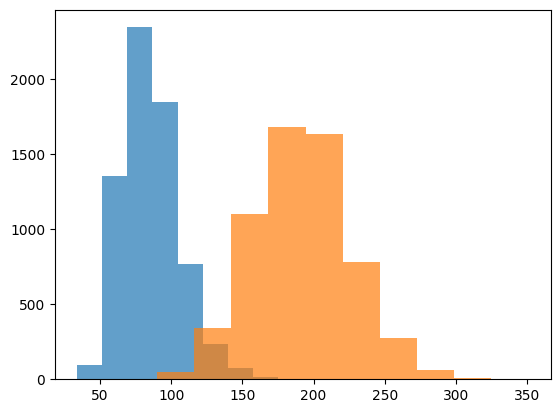

In [25]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [24]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

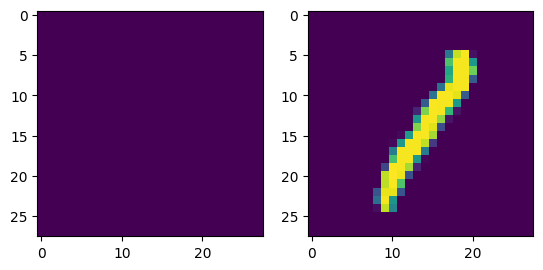

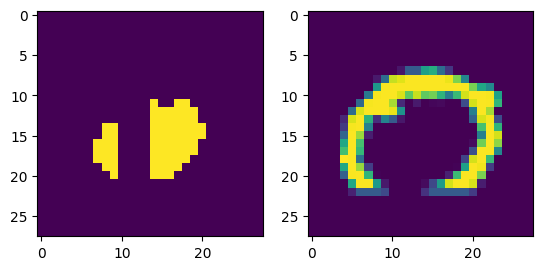

In [23]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

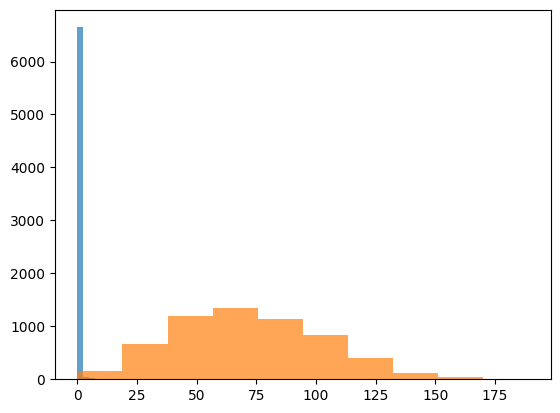

In [27]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [28]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

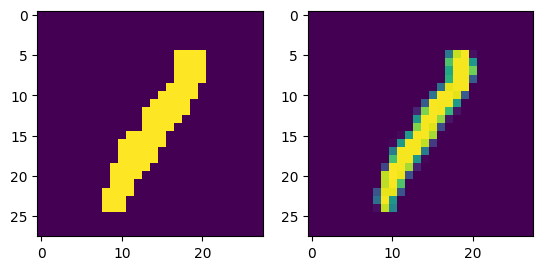

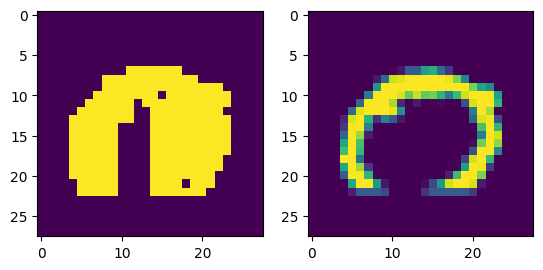

In [29]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

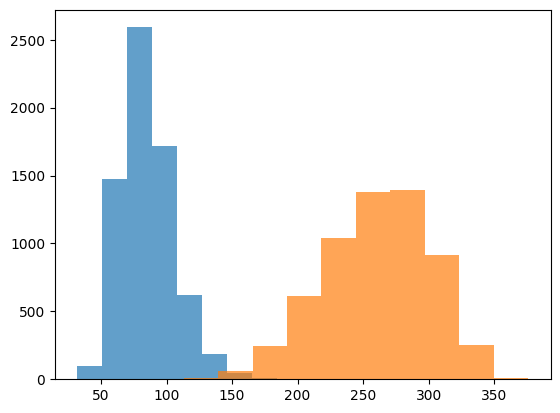

In [30]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [31]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

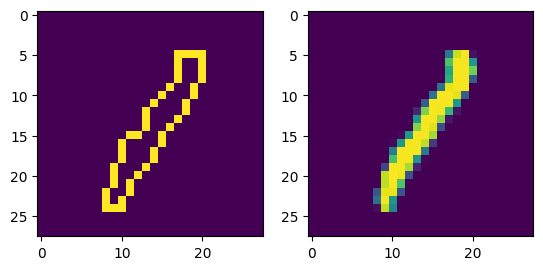

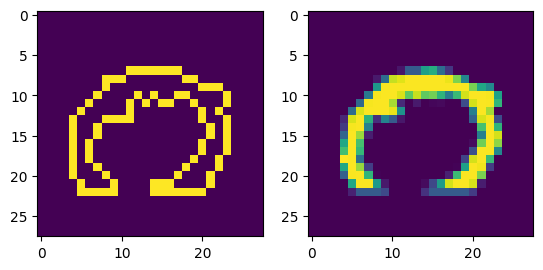

In [32]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

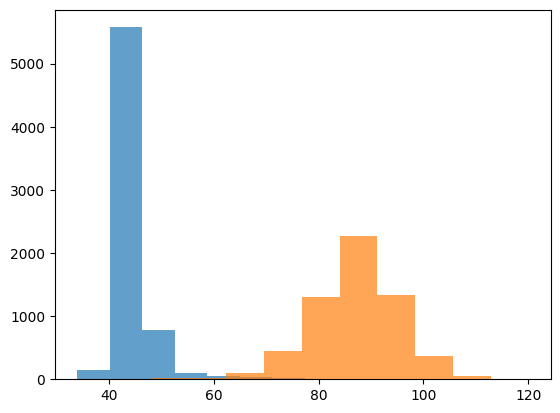

In [33]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

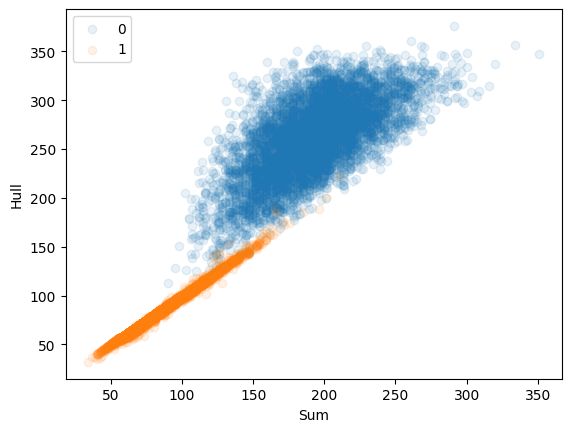

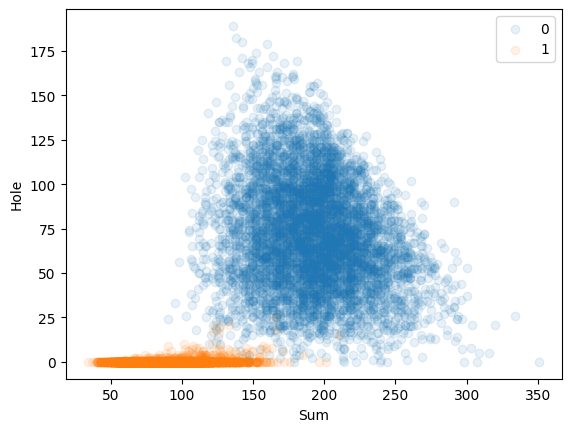

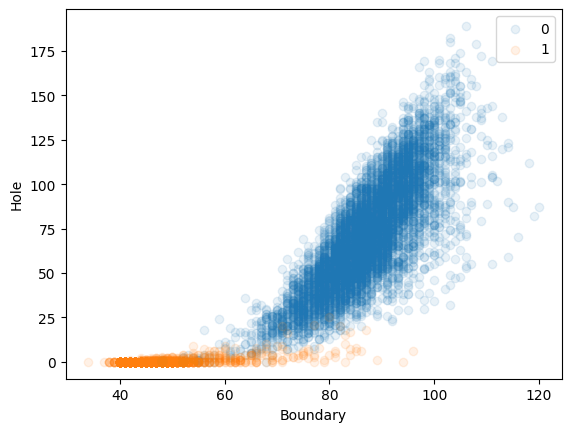

In [34]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [36]:
!pip install plotly
import plotly.express as px
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?

**ans:** For aplhabetical text, the bigram frequency is a good feature for distinguishing languages,for numerical data the number of boundary pixels in each image is the best way.The best combination of feature is placing the text in the form of subplot and observe the pixcels at the boundary.
2. How would you test or visualize four or more features?

**ans:** Testing four or more features involves using multi-dimensional visualization techniques such as scatter plots, parallel coordinates plots, heatmaps.
3. Can you come up with your own features?

**ans:**  In text classification, we can create features based on word counts, semantic feature, or syntactic features. In image classification, features could be extracted using color histograms of images, texture descriptors, extracted from pre-trained models.
4. Will these features work for different classes other than 0 and 1?

**ans:** I think these features would work for different classes becoz the features mentioned are the one of the common property of any numeric or aplhanumeric data.
5. What will happen if we take more that two classes at a time?

**ans:**  The complexity increases as the no.of classes increases.The metrics such as accuracy, precision, recall, and F1-score can be extended to multi-class scenarios to assess model performance.